## Experiment2A: Graphical analysis of the dataset

##### Loading the libraries and the dataset

In [2]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets 
from IPython.display import display 
import pylab
from sklearn.compose import ColumnTransformer
import sklearn
import keras.layers as kl
from numpy import genfromtxt
from numpy import asarray
from numpy import savetxt
import networkx as nx

In [3]:
df_arsenic_prelim = pd.read_csv (r'C:\Users\Ryan\Desktop\Research\Data\Prelim-data\as.csv')

In [4]:
df_arsenic_prelim

,SiteID,As,X_Albers,Y_Albers,WellDepth,AvgAnnualN_CAFO_1992_97,AvgAnnualN_Fert_1992_2001,AWC,AWS25,BFI,...,Transmiss,TWI,VRT,VWC,YngWtrMeanAge,YngWtrMeanAge_VertMean,DTW,Data,as10,Pred
0,1,6.0,924000.0,2006000.0,105.912831,16.678065,48.483771,0.141277,5.384314,21.0,...,143.362904,9.902970,5.956547,0.304000,23.158235,17.689265,3.082386,train,0.0,0.00
1,2,1.0,892000.0,2080000.0,54.861323,7.688502,50.638261,0.217775,7.311919,37.0,...,137.152244,9.067347,4.196766,0.343552,22.015855,17.739371,3.076582,train,0.0,0.06
2,3,13.0,886000.0,2066000.0,34.745504,6.245885,43.503552,0.140200,5.400000,33.0,...,121.646066,11.470297,17.558480,0.270166,17.762669,15.950136,5.645093,train,1.0,0.83
3,4,1.0,898000.0,2076000.0,59.737885,4.900404,34.132068,0.154753,5.318469,37.0,...,298.232568,9.815662,1.231952,0.328985,27.709500,17.589893,1.044807,train,0.0,0.03
4,5,2.0,896000.0,2062000.0,45.717769,6.511748,45.355325,0.140200,5.400000,28.0,...,97.123320,9.435353,21.539828,0.268193,19.238581,14.557619,8.535328,train,0.0,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,9998,1.0,610000.0,2484000.0,19.506248,8.030330,10.843744,0.159466,4.090000,59.0,...,115.224598,13.790910,0.416030,0.344196,8.765928,16.686542,0.188501,test,0.0,0.11
9998,9999,6.0,616000.0,2526000.0,24.992380,0.158934,0.199489,0.126106,4.030000,63.0,...,40.882361,11.154347,1.048951,0.253424,15.627269,11.281490,1.518130,test,0.0,0.01
9999,10000,0.0,602000.0,2586000.0,26.211521,0.004975,0.015434,0.126106,4.030000,66.0,...,59.112810,13.113131,0.520421,0.280687,21.815356,15.832110,0.643534,test,0.0,0.05
10000,10001,0.0,668000.0,2620000.0,12.496190,0.028986,0.058744,0.066700,2.000000,62.0,...,59.639661,12.550000,0.098656,0.367925,5.079691,14.141643,0.114506,test,0.0,0.01


##### Scatterplot of the first 100 high arsenic and low arsenic datapoints

In [5]:
df_arsenic_prelim.isnull().values.any()
df_arsenic_prelim.isnull().sum()
df_arsenic_prelim = df_arsenic_prelim.dropna()

In [6]:
x_coods = df_arsenic_prelim['X_Albers']
y_coods = df_arsenic_prelim['Y_Albers']
ars_vals = df_arsenic_prelim['As']

x_coods_high = df_arsenic_prelim['X_Albers'][df_arsenic_prelim['As']>10]
y_coods_high = df_arsenic_prelim['Y_Albers'][df_arsenic_prelim['As']>10]
x_coods_low = df_arsenic_prelim['X_Albers'][df_arsenic_prelim['As']<10]
y_coods_low = df_arsenic_prelim['Y_Albers'][df_arsenic_prelim['As']<10]

In [7]:
x_coods_high_mini = df_arsenic_prelim['X_Albers'][df_arsenic_prelim['As']>10][:100]
y_coods_high_mini = df_arsenic_prelim['Y_Albers'][df_arsenic_prelim['As']>10][:100]
x_coods_low_mini = df_arsenic_prelim['X_Albers'][df_arsenic_prelim['As']<10][:100]
y_coods_low_mini = df_arsenic_prelim['Y_Albers'][df_arsenic_prelim['As']<10][:100]

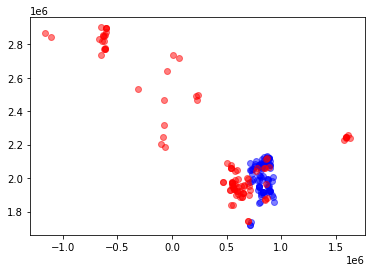

In [10]:
plt.scatter(x_coods_low_mini, y_coods_low_mini,color='blue',alpha=0.5)
plt.scatter(x_coods_high_mini, y_coods_high_mini,color='red',alpha=0.5)

##### Calculation of the Euclidean distance matrix 

In [13]:
euclidean_distance_matrix = np.zeros((df_arsenic_prelim.shape[0],df_arsenic_prelim.shape[0]))
Displacement_mat = np.zeros((df_arsenic_prelim.shape[0],2))
Displacement_mat[:,0] = df_arsenic_prelim['X_Albers']
Displacement_mat[:,1] = df_arsenic_prelim['Y_Albers']

for i in range(df_arsenic_prelim.shape[0]):
    for j in range(df_arsenic_prelim.shape[0]):
        euclidean_distance_matrix[i,j] = np.sqrt(np.power((Displacement_mat[i,0] - Displacement_mat[j,0]),2) + np.power((Displacement_mat[i,1] - Displacement_mat[j,1]),2) )

In [14]:
euclidean_distance_matrix

array([[     0.        ,  80622.57748299,  71021.12361826, ...,
        604370.74714119, 663388.27243176, 665230.78702056],
       [ 80622.57748299,      0.        ,  15231.54621173, ...,
        524492.13530805, 583211.79686285, 584616.11335987],
       [ 71021.12361826,  15231.54621173,      0.        , ...,
        533385.41412378, 592499.7890295 , 595348.63735462],
       ...,
       [604370.74714119, 524492.13530805, 533385.41412378, ...,
             0.        ,  61611.687203  , 107424.39201597],
       [663388.27243176, 583211.79686285, 592499.7890295 , ...,
         61611.687203  ,      0.        ,  74242.84477308],
       [665230.78702056, 584616.11335987, 595348.63735462, ...,
        107424.39201597,  74242.84477308,      0.        ]])

##### The lowest and the highest Euclidean distance between any two points found in the dataset

In [18]:
print("the Minimum Euclidean distance obtained is: ",np.min(euclidean_distance_matrix))
print("the Maximum Euclidean distance obtained is: ",np.max(euclidean_distance_matrix))
euclidean_distance_matrix.shape

the Minimum Euclidean distance obtained is:  0.0
the Maximum Euclidean distance obtained is:  4159862.016942389


(7616, 7616)

##### The lowest non-zero distance between any two points

In [20]:
a = euclidean_distance_matrix
minval = np.min(a[np.nonzero(a)])
minval

2000.0

##### Defining a cut_off distance for creating edges between the nodes

In [21]:
cutoff_euclidean = 5000

##### Determining which two nodes will have edges between them

In [23]:
num=0
Edge_matrix = np.zeros((df_arsenic_prelim.shape[0],df_arsenic_prelim.shape[0]))
for i in range(df_arsenic_prelim.shape[0]):
    for j in range(df_arsenic_prelim.shape[0]):
        if (i!=j) and  (euclidean_distance_matrix[i,j] > 0) and (euclidean_distance_matrix[i,j] < cutoff_euclidean):
            Edge_matrix[i,j]=1
            num+=1
print(num)

53950


##### Using networkX to determine the number of edges from the adjacency matrix

In [24]:
G = nx.from_numpy_matrix(Edge_matrix)
n = G.number_of_nodes()
m = G.number_of_edges()
print(n,m)

7616 26975


##### Defining the graph_analytical functions

In [34]:
def plot_distribution (data, xlabel='', ylabel='', title='', xlog = True, ylog= True, showLine=False, intAxis=False) :
    counts = {}
    for item in data :
        if item not in counts :
            counts [ item ] = 0
        counts [ item ] += 1
    counts = sorted ( counts.items () )
    fig = plt.figure ()
    ax = fig.add_subplot (111)
    ax.scatter ([ k for (k , v ) in counts ] , [ v for (k , v ) in counts ])
    if(len(counts)<20):  # for tiny graph
        showLine=True
    if showLine==True:
        ax.plot ([ k for (k , v ) in counts ] , [ v for (k , v ) in counts ])
    if xlog == True:
        ax.set_xscale ( 'log')
    if ylog == True:
        ax.set_yscale ( 'log')
    if intAxis == True:
        gca = fig.gca()
        gca.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.set_xlabel ( xlabel)
    ax.set_ylabel ( ylabel )
    plt.title ( title )
    #fig.savefig ( "degree_distribution.png" )
    
def plot_degree_bar (G) :
    degs = {}
    for n in G.nodes () :
        deg = G.degree ( n )
        if deg not in degs :
            degs [ deg ] = 0
        degs [ deg ] += 1
    items = sorted ( degs.items () )
    fig = plt.figure ()
    ax = fig.add_subplot (111)
    print(items)
    ax.bar([ k for (k , v ) in items ] , [ v for (k , v ) in items ])
    ax.set_xlabel ( 'Degree ($k$)')
    ax.set_ylabel ( 'Number of nodes with degree $k$ ($N_k$)')

In [41]:
#Graph analysis functions -
def Degree_Distribution(G):
    degree = G.degree()
    degree = [ deg for (v,deg) in degree ]
    sum_degree = np.sum(degree)
    plot_distribution(degree, xlabel='Degree ($k$)', 
                  ylabel='Number of nodes with degree $k$ ($N_k$)', title='Degree distributions')
    return sum_degree

# Input: A graph 
# Find the sizes of all connected components and plot the distribution
def CC_Distribution(G):
    cc_sorted = sorted(nx.connected_components(G), key=len, reverse=True)
    # print statistics of the top 5 components (if exist)
    topcc = min(len(cc_sorted), 5)
    for i in  range(topcc):
        cc = cc_sorted[i]
        cc_graph = G.subgraph(cc)
        n = cc_graph.number_of_nodes()
        m = cc_graph.number_of_edges()
        n_percent = (n/G.number_of_nodes()) * 100
        print("Largest component #", i+1)
        print("Number of vertices:", n, " (", n_percent, ")", "\nNumber of edges: ", m, "\n")
        if i == 0:
            size_of_largest_component = n

    cc_sizes = [len(c) for c in cc_sorted]
    plot_distribution(cc_sizes, xlabel='Weakly connected component size', 
                  ylabel='Count', title='Connected component size distributions')
    return size_of_largest_component

# Input: A graph 
# Find the local clustering coefficient of all vertices and plot distribution
def Clustering_Analysis(G):
    clust = nx.clustering(G)
    local_clust_coefficient = [ v for v in clust.values() ]
    avg_clust_coefficient = sum(local_clust_coefficient)/G.number_of_nodes()
    print("Average clustering coefficient: ", avg_clust_coefficient)
    #plot the distribution of clustering coefficient
    plot_distribution(local_clust_coefficient, xlabel='Clustering coefficient', 
                  ylabel='Number of vertices', title='Clustering coefficient distributions',
                      xlog=False, ylog=True, showLine=False)
    return avg_clust_coefficient

def ShortestPaths_Analysis(G):
    cc_sorted = sorted(nx.connected_components(G), key=len, reverse=True)

    # find shortest paths in top 5 components
    topcc = min(len(cc_sorted), 5)
    for i in  range(topcc) :
        cc = cc_sorted[i]
        cc_graph = G.subgraph(cc)
      
        if(len(cc)>30000):
            print("This component is too large. Using ten single-source shortest paths.")
            cc = list(cc)
            cc_graph = G.subgraph(cc)
            shortest_path_lens = []
            for i in range(10):
                length = nx.single_source_shortest_path_length(cc_graph, cc[i]) 
                shortest_path_lens += [ v for v in length.values() ]
        else:
            all_shortest_path_dict = dict(nx.all_pairs_shortest_path_length(cc_graph))
            shortest_path_lens = []
            for val1 in all_shortest_path_dict.values():
                for val in val1.values():
                    shortest_path_lens.append(val)
        
        average_shortest_path_lenght = np.average(shortest_path_lens)
        diameter_of_graph = np.max(shortest_path_lens)
        print(average_shortest_path_lenght,diameter_of_graph)
        plot_distribution(shortest_path_lens, xlabel='Shortest path lengths (hops)', 
                  ylabel='Number of paths', title='Shortest path lengths distributions',
                      xlog=False, ylog=False, showLine=True, intAxis=True)  
        return(average_shortest_path_lenght,diameter_of_graph)

### Analysing various Euclidean cutoff points Vs the graph properties for resulting graph

##### Analysis of graph properties with Euclidean cutoff_value = 2500

No_of_edges_formed:  8211
Largest component # 1
Number of vertices: 241  ( 3.164390756302521 ) 
Number of edges:  699 

Largest component # 2
Number of vertices: 200  ( 2.6260504201680672 ) 
Number of edges:  631 

Largest component # 3
Number of vertices: 140  ( 1.8382352941176472 ) 
Number of edges:  546 

Largest component # 4
Number of vertices: 111  ( 1.4574579831932772 ) 
Number of edges:  161 

Largest component # 5
Number of vertices: 91  ( 1.1948529411764706 ) 
Number of edges:  683 

Average clustering coefficient:  0.0


16422

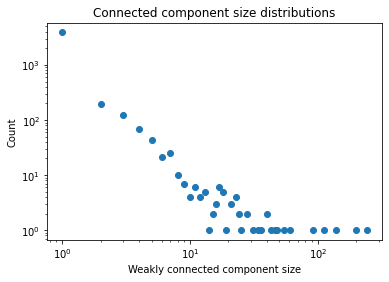

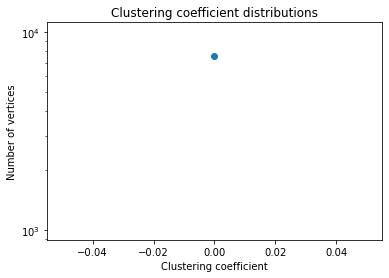

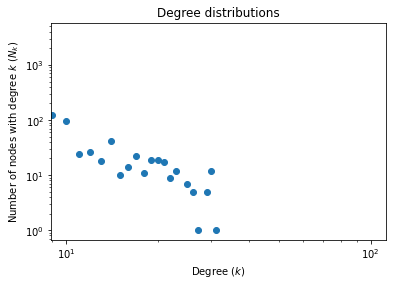

In [49]:
cutoff_euclidean = 2500
num=0
Edge_matrix = np.zeros((df_arsenic_prelim.shape[0],df_arsenic_prelim.shape[0]))
for i in range(df_arsenic_prelim.shape[0]):
    for j in range(df_arsenic_prelim.shape[0]):
        if (i!=j) and  (euclidean_distance_matrix[i,j] > 0) and (euclidean_distance_matrix[i,j] < cutoff_euclidean):
            Edge_matrix[i,j]=1
            num+=1
            
G = nx.from_numpy_matrix(Edge_matrix)
n = G.number_of_nodes()
m = G.number_of_edges()
print('No_of_edges_formed: ', m)

CC_Distribution(G)
Clustering_Analysis(G)
Degree_Distribution(G)

##### Analysis of graph properties with Euclidean cutoff_value = 3500

No_of_edges_formed:  14083
Largest component # 1
Number of vertices: 455  ( 5.974264705882353 ) 
Number of edges:  1893 

Largest component # 2
Number of vertices: 253  ( 3.321953781512605 ) 
Number of edges:  1277 

Largest component # 3
Number of vertices: 150  ( 1.9695378151260503 ) 
Number of edges:  953 

Largest component # 4
Number of vertices: 93  ( 1.2211134453781514 ) 
Number of edges:  1190 

Largest component # 5
Number of vertices: 68  ( 0.8928571428571428 ) 
Number of edges:  372 

Average clustering coefficient:  0.15770777288853755


28166

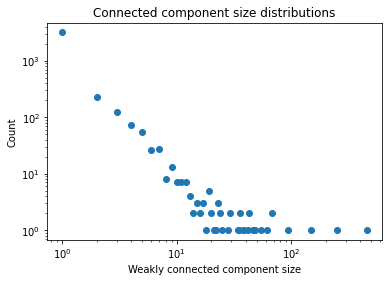

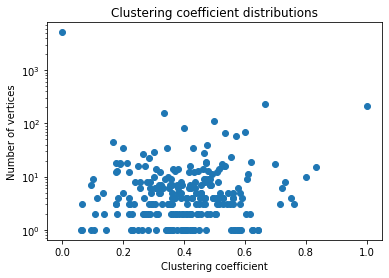

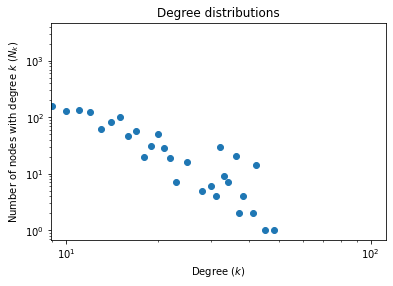

In [50]:
cutoff_euclidean = 3500
num=0
Edge_matrix = np.zeros((df_arsenic_prelim.shape[0],df_arsenic_prelim.shape[0]))
for i in range(df_arsenic_prelim.shape[0]):
    for j in range(df_arsenic_prelim.shape[0]):
        if (i!=j) and  (euclidean_distance_matrix[i,j] > 0) and (euclidean_distance_matrix[i,j] < cutoff_euclidean):
            Edge_matrix[i,j]=1
            num+=1
            
G = nx.from_numpy_matrix(Edge_matrix)
n = G.number_of_nodes()
m = G.number_of_edges()
print('No_of_edges_formed: ', m)

CC_Distribution(G)
Clustering_Analysis(G)
Degree_Distribution(G)

##### Analysis of graph properties with Euclidean cutoff_value = 5000

No_of_edges_formed:  26975
Largest component # 1
Number of vertices: 1094  ( 14.364495798319327 ) 
Number of edges:  10720 

Largest component # 2
Number of vertices: 225  ( 2.9543067226890756 ) 
Number of edges:  3800 

Largest component # 3
Number of vertices: 90  ( 1.1817226890756303 ) 
Number of edges:  702 

Largest component # 4
Number of vertices: 82  ( 1.0766806722689075 ) 
Number of edges:  1012 

Largest component # 5
Number of vertices: 69  ( 0.9059873949579833 ) 
Number of edges:  595 

Average clustering coefficient:  0.29737928788981927


53950

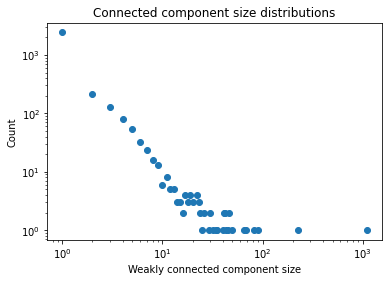

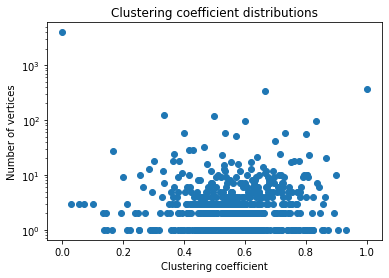

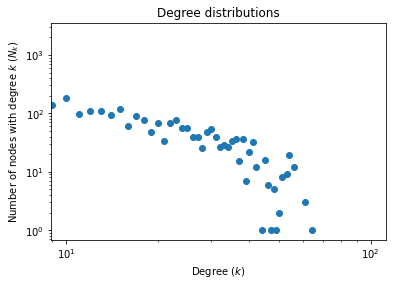

In [51]:
cutoff_euclidean = 5000
num=0
Edge_matrix = np.zeros((df_arsenic_prelim.shape[0],df_arsenic_prelim.shape[0]))
for i in range(df_arsenic_prelim.shape[0]):
    for j in range(df_arsenic_prelim.shape[0]):
        if (i!=j) and  (euclidean_distance_matrix[i,j] > 0) and (euclidean_distance_matrix[i,j] < cutoff_euclidean):
            Edge_matrix[i,j]=1
            num+=1
            
G = nx.from_numpy_matrix(Edge_matrix)
n = G.number_of_nodes()
m = G.number_of_edges()
print('No_of_edges_formed: ', m)

CC_Distribution(G)
Clustering_Analysis(G)
Degree_Distribution(G)

##### Analysis of graph properties with Euclidean cutoff_value = 6000

No_of_edges_formed:  30246
Largest component # 1
Number of vertices: 1101  ( 14.456407563025211 ) 
Number of edges:  12526 

Largest component # 2
Number of vertices: 225  ( 2.9543067226890756 ) 
Number of edges:  4016 

Largest component # 3
Number of vertices: 97  ( 1.2736344537815125 ) 
Number of edges:  822 

Largest component # 4
Number of vertices: 82  ( 1.0766806722689075 ) 
Number of edges:  1036 

Largest component # 5
Number of vertices: 69  ( 0.9059873949579833 ) 
Number of edges:  637 

Average clustering coefficient:  0.31095205023925826


60492

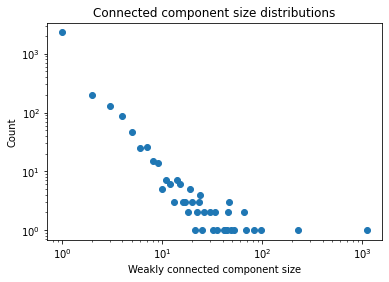

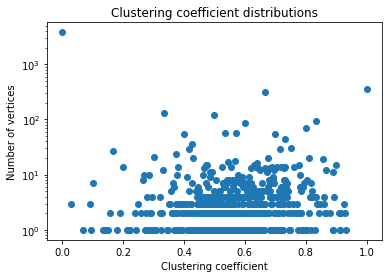

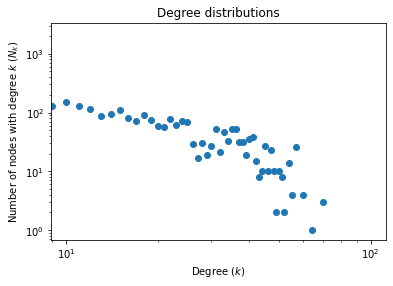

In [53]:
cutoff_euclidean = 6000
num=0
Edge_matrix = np.zeros((df_arsenic_prelim.shape[0],df_arsenic_prelim.shape[0]))
for i in range(df_arsenic_prelim.shape[0]):
    for j in range(df_arsenic_prelim.shape[0]):
        if (i!=j) and  (euclidean_distance_matrix[i,j] > 0) and (euclidean_distance_matrix[i,j] < cutoff_euclidean):
            Edge_matrix[i,j]=1
            num+=1
            
G = nx.from_numpy_matrix(Edge_matrix)
n = G.number_of_nodes()
m = G.number_of_edges()
print('No_of_edges_formed: ', m)

CC_Distribution(G)
Clustering_Analysis(G)
Degree_Distribution(G)

##### Analysis of graph properties with Euclidean cutoff_value = 7500

No_of_edges_formed:  45866
Largest component # 1
Number of vertices: 1102  ( 14.469537815126051 ) 
Number of edges:  21438 

Largest component # 2
Number of vertices: 242  ( 3.177521008403361 ) 
Number of edges:  4992 

Largest component # 3
Number of vertices: 185  ( 2.429096638655462 ) 
Number of edges:  540 

Largest component # 4
Number of vertices: 139  ( 1.825105042016807 ) 
Number of edges:  1546 

Largest component # 5
Number of vertices: 98  ( 1.2867647058823528 ) 
Number of edges:  762 

Average clustering coefficient:  0.40096939725661096


91732

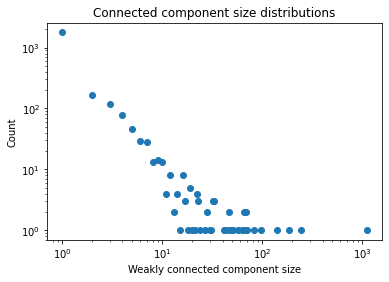

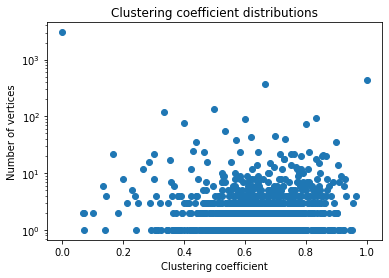

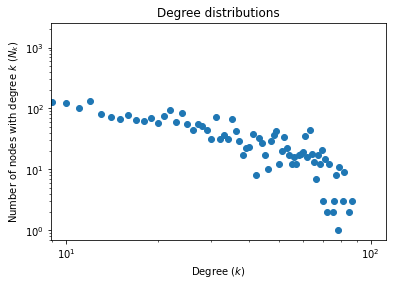

In [54]:
cutoff_euclidean = 7500
num=0
Edge_matrix = np.zeros((df_arsenic_prelim.shape[0],df_arsenic_prelim.shape[0]))
for i in range(df_arsenic_prelim.shape[0]):
    for j in range(df_arsenic_prelim.shape[0]):
        if (i!=j) and  (euclidean_distance_matrix[i,j] > 0) and (euclidean_distance_matrix[i,j] < cutoff_euclidean):
            Edge_matrix[i,j]=1
            num+=1
            
G = nx.from_numpy_matrix(Edge_matrix)
n = G.number_of_nodes()
m = G.number_of_edges()
print('No_of_edges_formed: ', m)

CC_Distribution(G)
Clustering_Analysis(G)
Degree_Distribution(G)

##### Analysis of graph properties with Euclidean cutoff_value = 10000

No_of_edges_formed:  61977
Largest component # 1
Number of vertices: 1102  ( 14.469537815126051 ) 
Number of edges:  30861 

Largest component # 2
Number of vertices: 242  ( 3.177521008403361 ) 
Number of edges:  6118 

Largest component # 3
Number of vertices: 193  ( 2.534138655462185 ) 
Number of edges:  775 

Largest component # 4
Number of vertices: 147  ( 1.9301470588235294 ) 
Number of edges:  2145 

Largest component # 5
Number of vertices: 99  ( 1.2998949579831933 ) 
Number of edges:  936 

Average clustering coefficient:  0.4629421527401072


123954

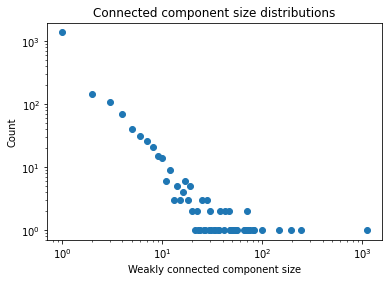

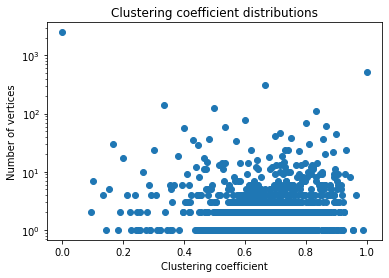

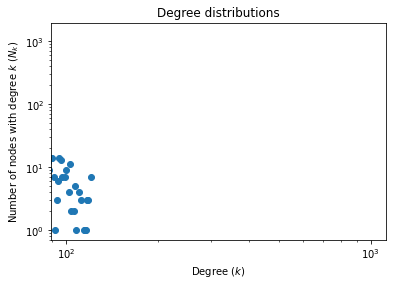

In [55]:
cutoff_euclidean = 10000
num=0
Edge_matrix = np.zeros((df_arsenic_prelim.shape[0],df_arsenic_prelim.shape[0]))
for i in range(df_arsenic_prelim.shape[0]):
    for j in range(df_arsenic_prelim.shape[0]):
        if (i!=j) and  (euclidean_distance_matrix[i,j] > 0) and (euclidean_distance_matrix[i,j] < cutoff_euclidean):
            Edge_matrix[i,j]=1
            num+=1
            
G = nx.from_numpy_matrix(Edge_matrix)
n = G.number_of_nodes()
m = G.number_of_edges()
print('No_of_edges_formed: ', m)

CC_Distribution(G)
Clustering_Analysis(G)
Degree_Distribution(G)

##### Analysis of graph properties with Euclidean cutoff_value = 15000

No_of_edges_formed:  121963
Largest component # 1
Number of vertices: 1126  ( 14.784663865546218 ) 
Number of edges:  64864 

Largest component # 2
Number of vertices: 360  ( 4.726890756302521 ) 
Number of edges:  4034 

Largest component # 3
Number of vertices: 329  ( 4.31985294117647 ) 
Number of edges:  1768 

Largest component # 4
Number of vertices: 249  ( 3.269432773109244 ) 
Number of edges:  1744 

Largest component # 5
Number of vertices: 243  ( 3.1906512605042012 ) 
Number of edges:  13789 

Average clustering coefficient:  0.5699855430065267


243926

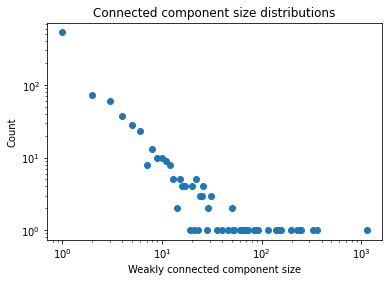

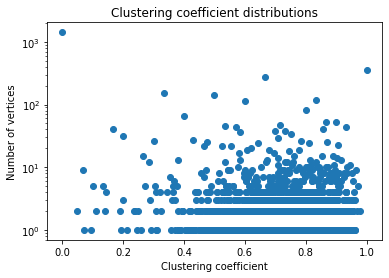

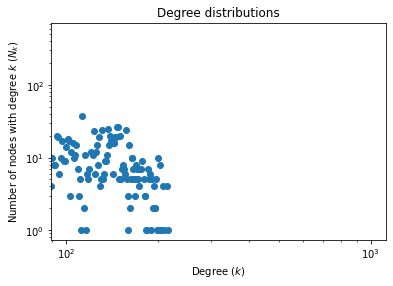

In [52]:
cutoff_euclidean = 15000
num=0
Edge_matrix = np.zeros((df_arsenic_prelim.shape[0],df_arsenic_prelim.shape[0]))
for i in range(df_arsenic_prelim.shape[0]):
    for j in range(df_arsenic_prelim.shape[0]):
        if (i!=j) and  (euclidean_distance_matrix[i,j] > 0) and (euclidean_distance_matrix[i,j] < cutoff_euclidean):
            Edge_matrix[i,j]=1
            num+=1
            
G = nx.from_numpy_matrix(Edge_matrix)
n = G.number_of_nodes()
m = G.number_of_edges()
print('No_of_edges_formed: ', m)

CC_Distribution(G)
Clustering_Analysis(G)
Degree_Distribution(G)